In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import scorecardpy as sc

In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [22]:
df_train = pd.read_csv('../../data/raw/application_train.csv', dtype={"SK_ID_CURR": "object"})
df_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     100002       1         Cash loans           M            N   
1     100003       0         Cash loans           F            N   
2     100004       0    Revolving loans           M            Y   
3     100006       0         Cash loans           F            N   
4     100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0 

In [23]:
BEST_FEATURES = [
    'AMT_REQ_CREDIT_BUREAU_MON',
    'CODE_GENDER',
    'DAYS_EMPLOYED',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'EXT_SOURCE_2',
     'EXT_SOURCE_3',
    'FLAG_OWN_REALTY',
    'NAME_CONTRACT_TYPE',
    'NAME_EDUCATION_TYPE',
    'ORGANIZATION_TYPE',
    'OWN_CAR_AGE',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'REG_REGION_NOT_WORK_REGION'
]

In [24]:
df_train = df_train[['SK_ID_CURR', 'TARGET'] + BEST_FEATURES]

In [25]:
df_train.shape

(307511, 17)

In [26]:
df_train = df_train[['SK_ID_CURR', 'TARGET'] + BEST_FEATURES]

df_train["AMT_REQ_CREDIT_BUREAU_MON"].fillna(
    df_train["AMT_REQ_CREDIT_BUREAU_MON"].median(), inplace=True
)
df_train["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(
    df_train["DEF_30_CNT_SOCIAL_CIRCLE"].median(), inplace=True
)
df_train["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(
    df_train["DEF_60_CNT_SOCIAL_CIRCLE"].median(), inplace=True
)
df_train["EXT_SOURCE_2"].fillna(df_train["EXT_SOURCE_2"].median(), inplace=True)
df_train["EXT_SOURCE_3"].fillna(df_train["EXT_SOURCE_2"].median(), inplace=True)

In [27]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  object 
 1   TARGET                      307511 non-null  int64  
 2   AMT_REQ_CREDIT_BUREAU_MON   307511 non-null  float64
 3   CODE_GENDER                 307511 non-null  object 
 4   DAYS_EMPLOYED               307511 non-null  int64  
 5   DEF_30_CNT_SOCIAL_CIRCLE    307511 non-null  float64
 6   DEF_60_CNT_SOCIAL_CIRCLE    307511 non-null  float64
 7   EXT_SOURCE_2                307511 non-null  float64
 8   EXT_SOURCE_3                307511 non-null  float64
 9   FLAG_OWN_REALTY             307511 non-null  object 
 10  NAME_CONTRACT_TYPE          307511 non-null  object 
 11  NAME_EDUCATION_TYPE         307511 non-null  object 
 12  ORGANIZATION_TYPE           307511 non-null  object 
 13  OWN_CAR_AGE   

In [28]:
df_train.isna().sum()

SK_ID_CURR                         0
TARGET                             0
AMT_REQ_CREDIT_BUREAU_MON          0
CODE_GENDER                        0
DAYS_EMPLOYED                      0
DEF_30_CNT_SOCIAL_CIRCLE           0
DEF_60_CNT_SOCIAL_CIRCLE           0
EXT_SOURCE_2                       0
EXT_SOURCE_3                       0
FLAG_OWN_REALTY                    0
NAME_CONTRACT_TYPE                 0
NAME_EDUCATION_TYPE                0
ORGANIZATION_TYPE                  0
OWN_CAR_AGE                   202929
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
REG_REGION_NOT_WORK_REGION         0
dtype: int64

In [29]:
from sklearn.preprocessing import KBinsDiscretizer

In [30]:
estimator = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')

In [31]:
non_obj = df_train.columns[df_train.dtypes == 'float']
non_obj

Index(['AMT_REQ_CREDIT_BUREAU_MON', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OWN_CAR_AGE'],
      dtype='object')

In [32]:
estimator.fit(df_train[['OWN_CAR_AGE']].dropna())
estimator.bin_edges_

array([array([ 0.        , 12.28897722, 41.04611692, 77.28260242, 91.        ])],
      dtype=object)

In [33]:
df_train['OWN_CAR_AGE'] = pd.cut(df_train['OWN_CAR_AGE'], bins=estimator.bin_edges_[0],
                                 ordered=False,
                                 labels=['1', '2', '3', '4'],
                                 include_lowest=True)

In [34]:
df_train['OWN_CAR_AGE'].dtype

CategoricalDtype(categories=['1', '2', '3', '4'], ordered=False)

In [38]:
df_train['FLAG_OWN_REALTY'] = df_train['FLAG_OWN_REALTY'].apply(lambda x: 1 if x == 'Y'
                                                                      else 0)
df_train['NAME_CONTRACT_TYPE'] = df_train['NAME_CONTRACT_TYPE'].apply(lambda x: 1 if x == 'Cash loans'
                                                                            else 0)

In [39]:
categorical_cols = df_train.columns[df_train.dtypes == 'object']

In [40]:
df_train[categorical_cols].nunique()

SK_ID_CURR             307511
CODE_GENDER                 3
NAME_EDUCATION_TYPE         5
ORGANIZATION_TYPE          58
dtype: int64

In [41]:
df_train.nunique()

SK_ID_CURR                    307511
TARGET                             2
AMT_REQ_CREDIT_BUREAU_MON         24
CODE_GENDER                        3
DAYS_EMPLOYED                  12574
DEF_30_CNT_SOCIAL_CIRCLE          10
DEF_60_CNT_SOCIAL_CIRCLE           9
EXT_SOURCE_2                  119831
EXT_SOURCE_3                     815
FLAG_OWN_REALTY                    2
NAME_CONTRACT_TYPE                 2
NAME_EDUCATION_TYPE                5
ORGANIZATION_TYPE                 58
OWN_CAR_AGE                        4
REG_CITY_NOT_LIVE_CITY             2
REG_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION         2
dtype: int64

In [8]:
# bins = sc.woebin(df_train[['OWN_CAR_AGE', 'TARGET']].dropna(), y='TARGET')
# bins['OWN_CAR_AGE']

In [9]:
from data_preprocessing import preprocessing

In [10]:
df_train = preprocessing(df=df_train)

In [13]:
df_train.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                        0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [19]:
df_train.shape

(307511, 75)

In [14]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [15]:
df_test = pd.read_csv('data/application_test.csv')
df_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [102]:
df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

In [103]:
df_test.isna().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        24
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                   911
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     32312
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [104]:
df_test['AMT_ANNUITY'].fillna(df_test['AMT_ANNUITY'].median(), inplace=True)

df_test['EXT_SOURCE_1'] = df_test['EXT_SOURCE_1'].notna()
df_test['EXT_SOURCE_2'].fillna(df_test['EXT_SOURCE_2'].median(), inplace=True)
df_test['FLAG_EXT_SOURCE_3'] = df_test['EXT_SOURCE_3'].notna()
df_test['EXT_SOURCE_3'].fillna(df_test['EXT_SOURCE_2'].median(), inplace=True)

# Убираем AVG и MODE, а из колонок с MEDI делаем бинарные признаки
df_test.drop(df_test.iloc[:, 43:71].columns, axis=1, inplace=True)
df_test = df_test.rename(columns=dict(zip(df_test.columns[43:62], 
                                          list(map(lambda x: x[:-5],
                                                   df_test.iloc[:, 43:62]
                                                   .columns))
                                         )))
for col in df_test.columns[43:62]:
    df_test[col] = df_test[col].notna()

df_test.drop(df_test.columns[43:61], axis=1, inplace=True)
df_test = df_test.rename(columns={'EMERGENCYSTATE': 'FLAG_APARTMENTS_INFO'})

df_test['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df_test['OBS_30_CNT_SOCIAL_CIRCLE']
                                           .median(), inplace=True)
df_test['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df_test['DEF_30_CNT_SOCIAL_CIRCLE']
                                           .median(), inplace=True)
df_test['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df_test['OBS_60_CNT_SOCIAL_CIRCLE']
                                           .median(), inplace=True)
df_test['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df_test['DEF_60_CNT_SOCIAL_CIRCLE']
                                           .median(), inplace=True)

df_test.drop(['AMT_REQ_CREDIT_BUREAU_HOUR',
              'AMT_REQ_CREDIT_BUREAU_DAY',
              'AMT_REQ_CREDIT_BUREAU_QRT'], axis=1, inplace=True)

# Создаём флаг, показывающий, есть ли информация по бюро
df_test['FLAG_BUREAU_INFO'] = df_test['AMT_REQ_CREDIT_BUREAU_WEEK'].notna()
df_test['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df_test['AMT_REQ_CREDIT_BUREAU_WEEK']
                                             .median(), inplace=True)
df_test['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df_test['AMT_REQ_CREDIT_BUREAU_MON']
                                             .median(), inplace=True)
df_test['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df_test['AMT_REQ_CREDIT_BUREAU_YEAR']
                                             .median(), inplace=True)

# Делаем биннинг переменной на основе бинов, полученных выше
df_test['OWN_CAR_AGE'] = df_test['OWN_CAR_AGE'] \
                                .apply(lambda x: '1' if x < 10 else 
                                                '2' if x < 17 else 
                                                '3' if x >= 17 else 
                                                '0')

# Сделаем OHE и удалим столбец с наибольшим числом нулей
df_test = improved_ohe(df_test, ['NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
                                 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 
                                 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                                 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                                 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                                 'OWN_CAR_AGE', 'WEEKDAY_APPR_PROCESS_START',
                                 'ORGANIZATION_TYPE'])

In [105]:
df_test.isna().sum()

SK_ID_CURR                                           0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
AMT_CREDIT                                           0
AMT_ANNUITY                                          0
AMT_GOODS_PRICE                                      0
REGION_POPULATION_RELATIVE                           0
DAYS_BIRTH                                           0
DAYS_EMPLOYED                                        0
DAYS_REGISTRATION                                    0
DAYS_ID_PUBLISH                                      0
FLAG_MOBIL                                           0
FLAG_EMP_PHONE                                       0
FLAG_WORK_PHONE                                      0
FLAG_CONT_MOBILE                                     0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_FAM_MEMBERS                                      0
REGION_RAT

In [87]:
y = df_train['TARGET']

In [107]:
# df_train.drop('TARGET', axis=1, inplace=True)

In [108]:
df_train.shape, df_test.shape

((307511, 190), (48744, 186))

In [109]:
set(df_train.columns) - set(df_test.columns)

{'CODE_GENDER_XNA',
 'NAME_FAMILY_STATUS_Unknown',
 'NAME_INCOME_TYPE_Maternity leave',
 'TARGET'}

In [17]:
df_train.drop(['CODE_GENDER_XNA',
               'NAME_FAMILY_STATUS_Unknown',
               'NAME_INCOME_TYPE_Maternity leave'],
               axis=1,
               inplace=True)

In [112]:
(df_train.drop(['TARGET'], axis=1).columns != df_test.columns).sum()

0

In [20]:
df_train.to_csv('data/train_modified.csv', index=False)
df_test.to_csv('data/test_modified.csv', index=False)

In [18]:
# В задаче имеем сильный дисбаланс классов
df_train['TARGET'].mean()

0.08072881945686496

In [107]:
# Проверяем значимость бинарных признаков. Средние данные о жилье почти одно и
# то же, можно дропнуть всё. кроме одного.
# print('_' * 80)
# for col in df_train.columns[44:63]:
#     print(df_train.groupby(col)['TARGET'].mean())
#     print('_' * 80)

In [108]:
# Признак с наименьшим числом пропусков
# df_train[df_train.columns[44:63]].sum().idxmax(), df_train.columns[44:63]

In [159]:
df_train.describe(include='object')

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
count            307511                         307511             307511   
unique                8                              5                  6   
top             Working  Secondary / secondary special            Married   
freq             158774                         218391             196432   

        NAME_HOUSING_TYPE WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  
count              307511                     307511                  307511  
unique                  6                          7                      58  
top     House / apartment                    TUESDAY  Business Entity Type 3  
freq               272868                      53901                   67992

In [57]:
df_train.drop(df_train.columns[(df_train.isna().sum() > 40000).values], axis=1,
              inplace=True)
df_train.shape

(307511, 65)

In [58]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [41]:
df_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean        -4986.120328     -2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7479.500000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307509.000000         307511.000000                307511.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910682              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

In [96]:
df_train.describe(include=['object'])

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE WEEKDAY_APPR_PROCESS_START  \
count              307511             307511                     307511   
unique                  6                  6                          7   
top               Married  House / apartment                    TUESDAY   
freq               196432             272868                      53901   

             ORGANIZATION_TYPE  
count                   307511  
unique                      58  
top     Business Entity Type 3  
freq                     67992

In [119]:
df_train.columns[df_train.dtypes == 'float64'].drop(['CNT_FAM_MEMBERS', 
                                                    'OBS_30_CNT_SOCIAL_CIRCLE',
                                                    'DEF_30_CNT_SOCIAL_CIRCLE'])

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'EXT_SOURCE_2',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

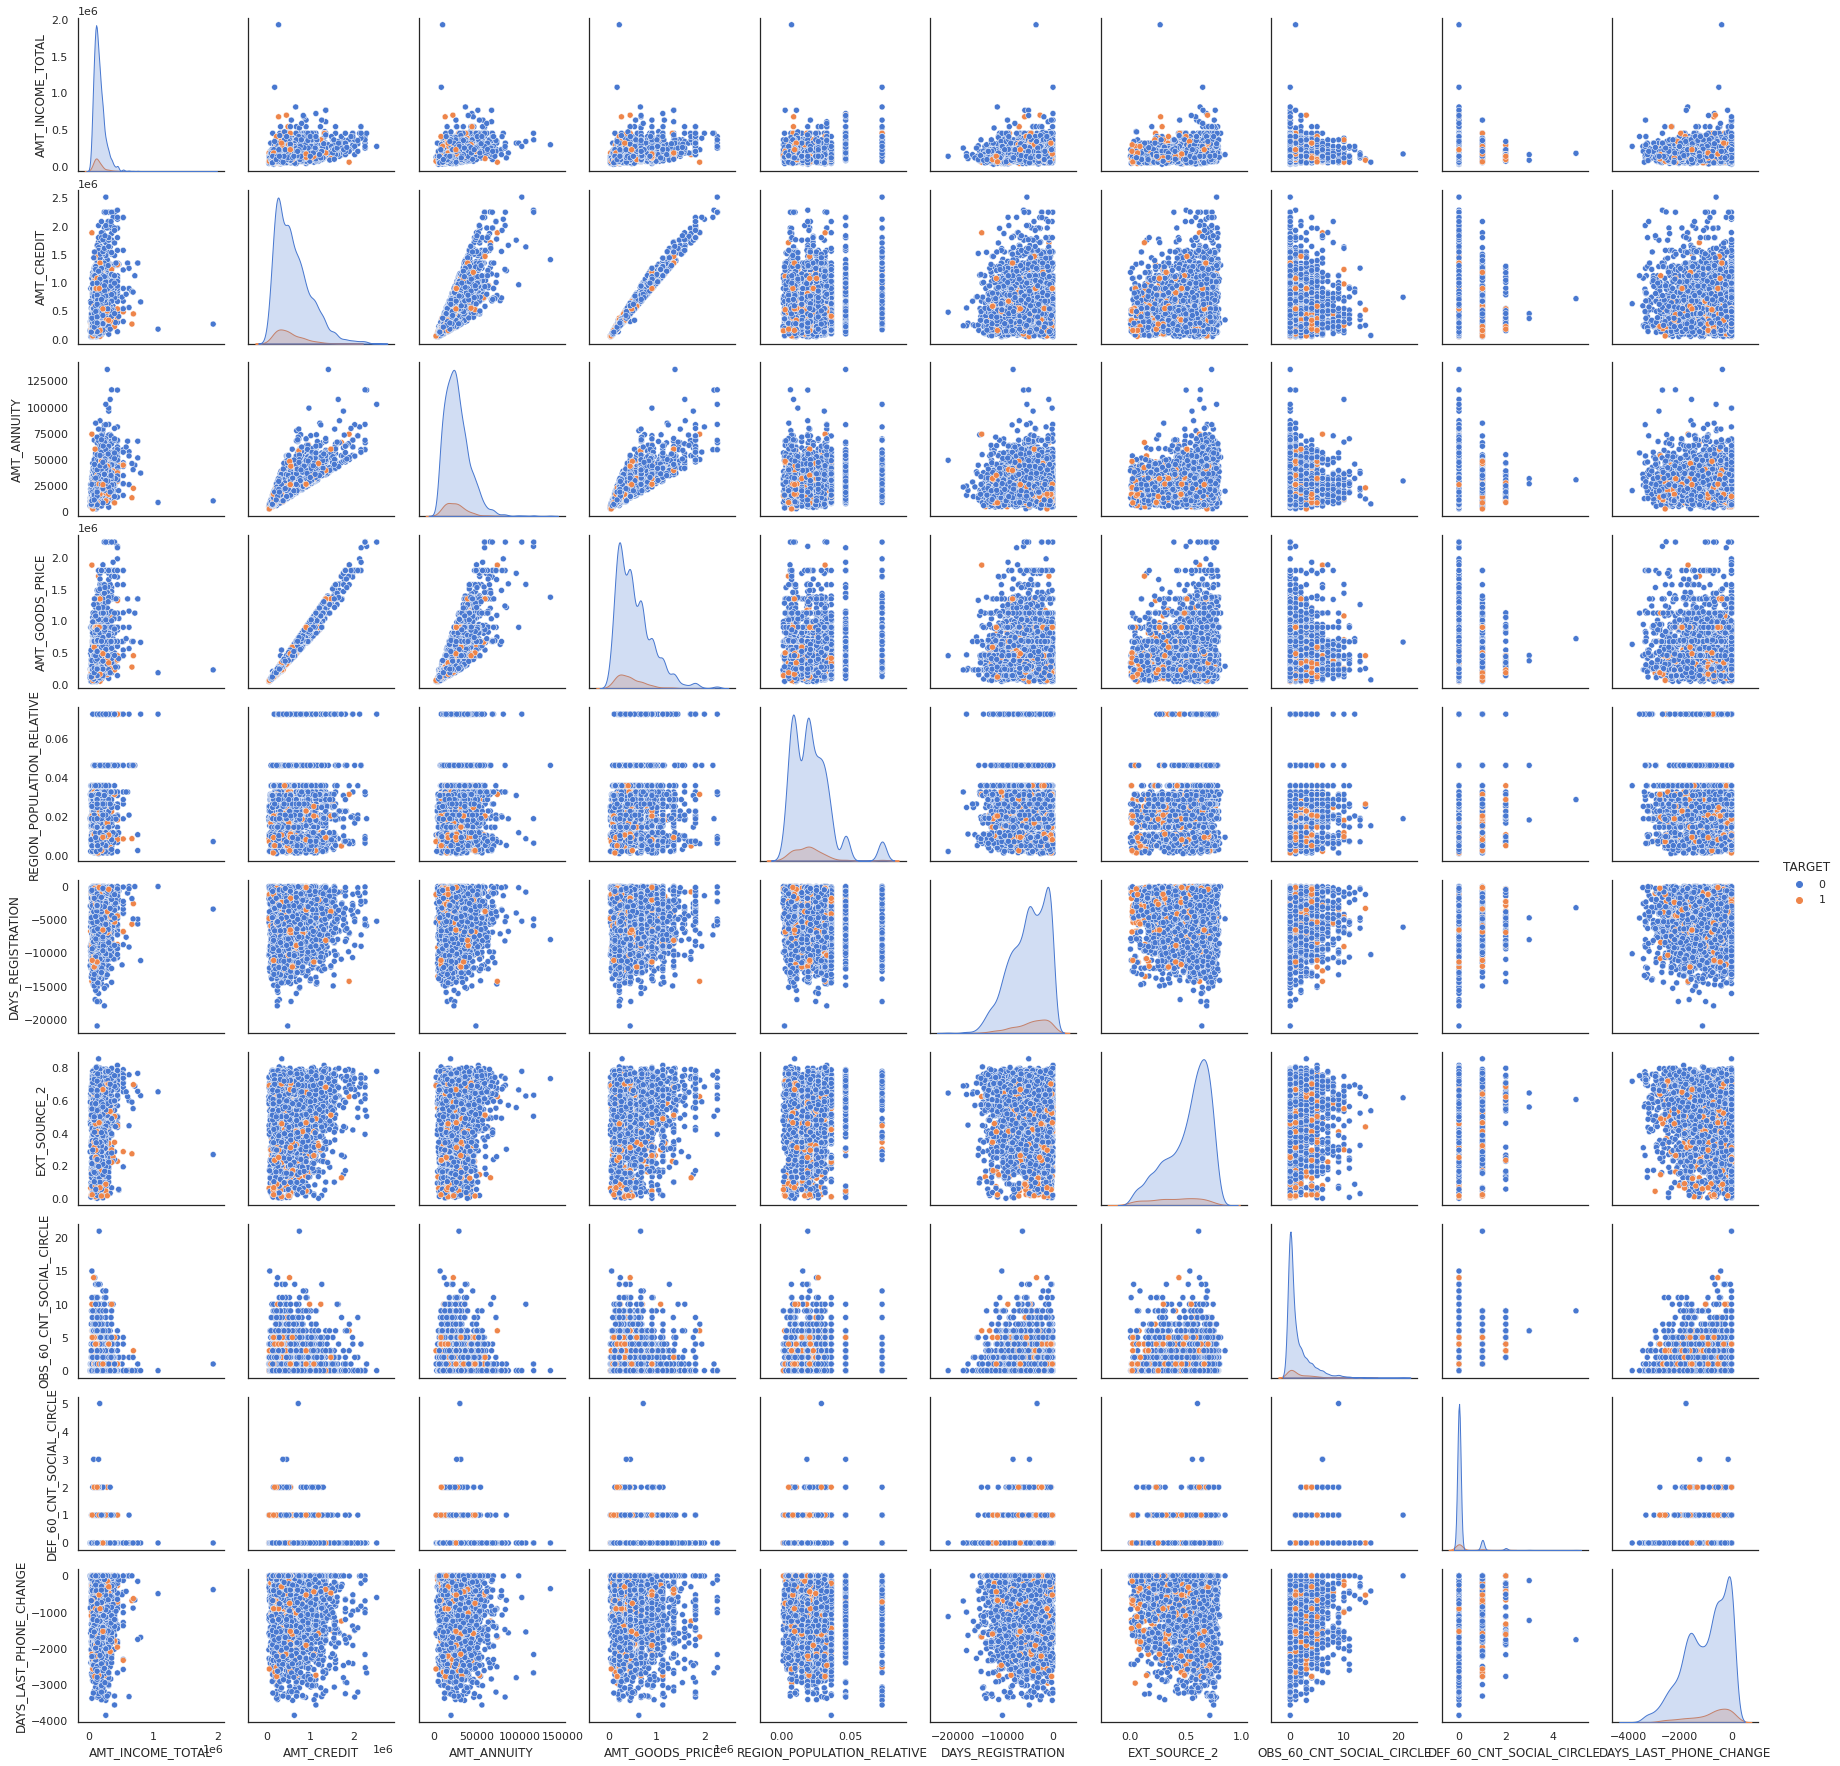

In [122]:
sns.set(
    style="white", 
    palette="muted", 
    color_codes=True,
    rc={'figure.figsize':(20,20)}
)
sns.pairplot(
    df_train[:3000][list(df_train.columns[df_train.dtypes == 'float64']
                                 .drop(['CNT_FAM_MEMBERS', 
                                        'OBS_30_CNT_SOCIAL_CIRCLE',
                                        'DEF_30_CNT_SOCIAL_CIRCLE']))
                                        + ['TARGET']]
                                 .dropna(), 
    hue='TARGET'
);

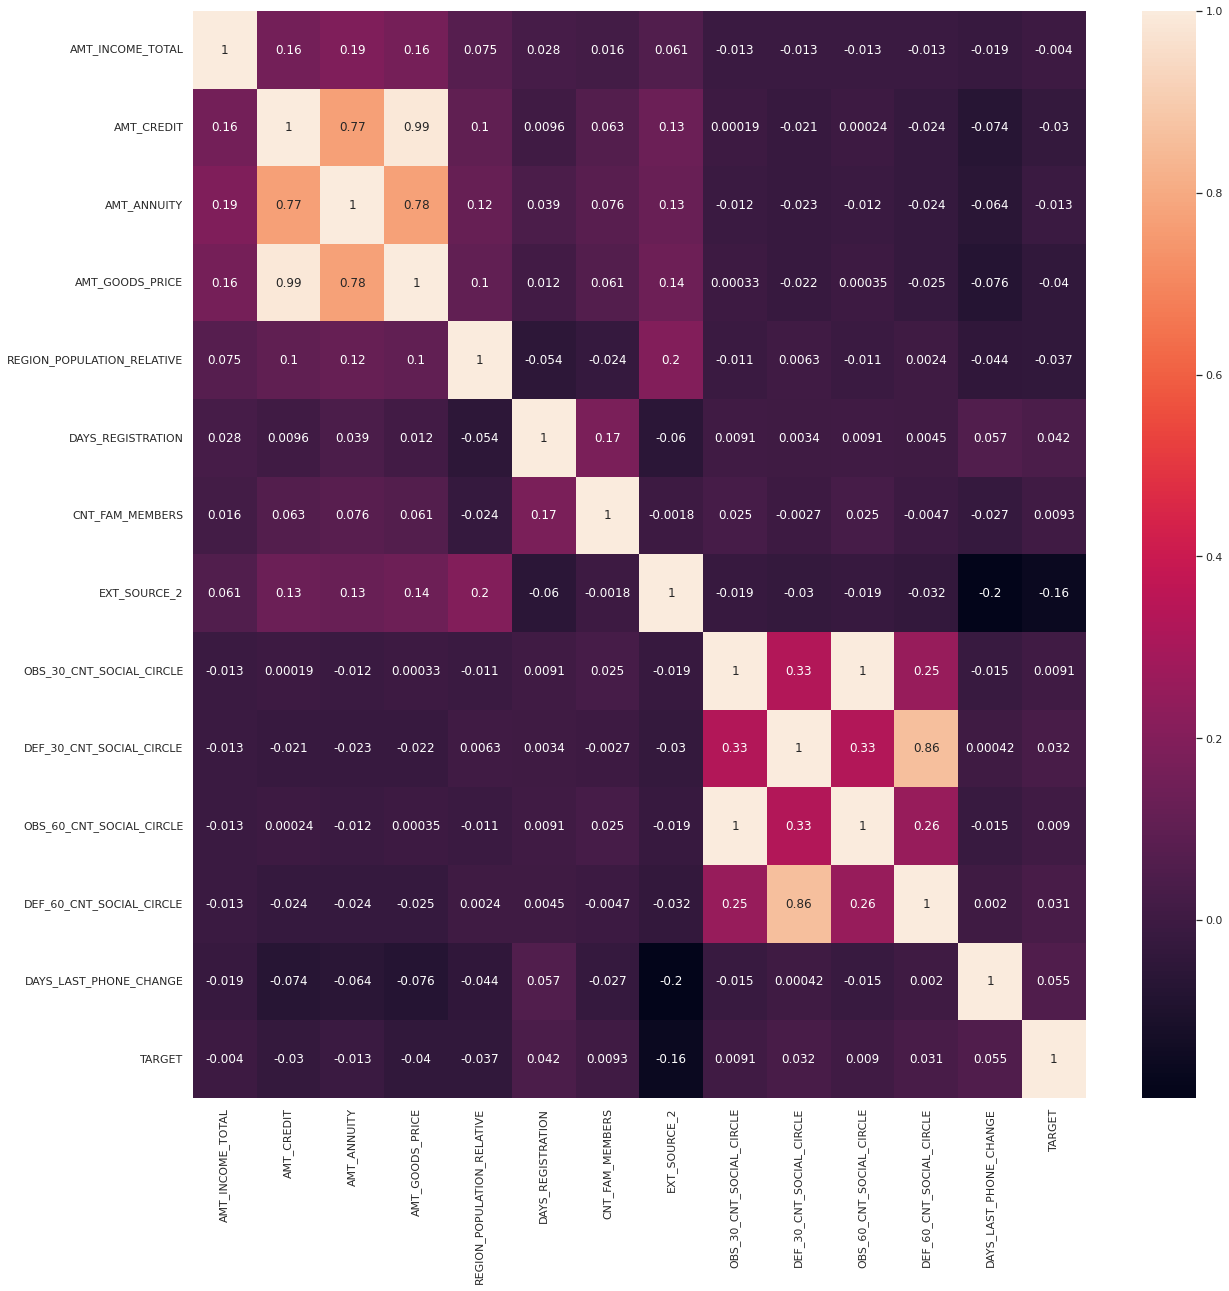

In [132]:
sns.heatmap(
    df_train[list(df_train.columns[df_train.dtypes == 'float']) + ["TARGET"]]
            .corr(),
    annot=True
);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


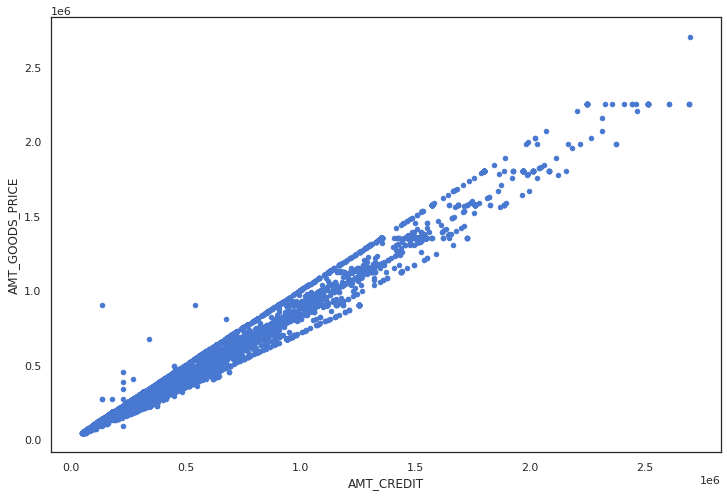

In [140]:
df_train.sample(10000).plot(x='AMT_CREDIT', y='AMT_GOODS_PRICE', kind='scatter', figsize=(12, 8));